# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [92]:
heroes_df = pd.read_csv("heroes_information.csv")
powers_df = pd.read_csv("super_hero_powers.csv")

In [93]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [94]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [95]:
heroes_df.columns

Index(['Unnamed: 0', 'name', 'Gender', 'Eye color', 'Race', 'Hair color',
       'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [96]:
heroes_df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [97]:
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [98]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [99]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Misfit,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [100]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [101]:
heroes_df["Publisher"].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', nan, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [102]:
heroes_df["Publisher"].loc[heroes_df["Publisher"].isna()] = "Unknown publisher"

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [103]:
heroes_df[heroes_df["Publisher"].isna()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight


In [104]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     734 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [105]:
heroes_df["Publisher"].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', 'Unknown publisher', 'Icon Comics',
       'SyFy', 'Hanna-Barbera', 'George Lucas', 'Team Epic TV',
       'South Park', 'HarperCollins', 'ABC Studios', 'Universal Studios',
       'Star Trek', 'IDW Publishing', 'Shueisha', 'Sony Pictures',
       'J. K. Rowling', 'Titan Books', 'Rebellion', 'Microsoft',
       'J. R. R. Tolkien'], dtype=object)

In [106]:
heroes_df = heroes_df[~heroes_df["Weight"].isna()]

In [107]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 733
Data columns (total 10 columns):
name          732 non-null object
Gender        732 non-null object
Eye color     732 non-null object
Race          732 non-null object
Hair color    732 non-null object
Height        732 non-null float64
Publisher     732 non-null object
Skin color    732 non-null object
Alignment     732 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 62.9+ KB


In [108]:
type_dict = {}
for column in heroes_df.columns:
    variable_type = type(heroes_df[column][0])
    type_dict[column] = variable_type

In [109]:
for column in heroes_df.columns:
    variable_type = type(heroes_df[column][0])
    print(heroes_df[column].apply(variable_type).dtypes)

object
object
object
object
object
float64
object
object
object
float64


In [110]:
heroes_df.dtypes

name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

In [111]:
type_dict

{'name': str,
 'Gender': str,
 'Eye color': str,
 'Race': str,
 'Hair color': str,
 'Height': numpy.float64,
 'Publisher': str,
 'Skin color': str,
 'Alignment': str,
 'Weight': numpy.float64}

In [112]:
heroes_df = heroes_df.astype(type_dict)

In [113]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 733
Data columns (total 10 columns):
name          732 non-null object
Gender        732 non-null object
Eye color     732 non-null object
Race          732 non-null object
Hair color    732 non-null object
Height        732 non-null float64
Publisher     732 non-null object
Skin color    732 non-null object
Alignment     732 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 82.9+ KB


In [114]:
heroes_df.dtypes

name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

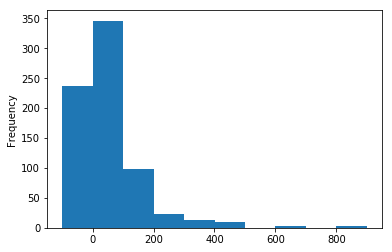

In [115]:
heroes_df["Weight"].plot.hist()

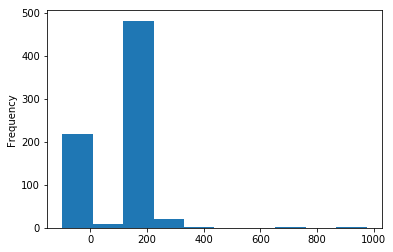

In [116]:
heroes_df["Height"].plot.hist()

In [117]:
heroes_df = heroes_df[heroes_df["Weight"] > 0]
heroes_df = heroes_df[heroes_df["Height"] > 0]

In [118]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 733
Data columns (total 10 columns):
name          490 non-null object
Gender        490 non-null object
Eye color     490 non-null object
Race          490 non-null object
Hair color    490 non-null object
Height        490 non-null float64
Publisher     490 non-null object
Skin color    490 non-null object
Alignment     490 non-null object
Weight        490 non-null float64
dtypes: float64(2), object(8)
memory usage: 42.1+ KB


In [119]:
powers_df.shape

(667, 168)

In [120]:
powers_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 168 columns):
hero_names                      object
Agility                         bool
Accelerated Healing             bool
Lantern Power Ring              bool
Dimensional Awareness           bool
Cold Resistance                 bool
Durability                      bool
Stealth                         bool
Energy Absorption               bool
Flight                          bool
Danger Sense                    bool
Underwater breathing            bool
Marksmanship                    bool
Weapons Master                  bool
Power Augmentation              bool
Animal Attributes               bool
Longevity                       bool
Intelligence                    bool
Super Strength                  bool
Cryokinesis                     bool
Telepathy                       bool
Energy Armor                    bool
Energy Blasts                   bool
Duplication                     bool
Size

In [121]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [122]:
for column in powers_df.columns:    
    powers_df = powers_df[~powers_df[column].isna()]

In [123]:
powers_df.shape

(667, 168)

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [124]:
heroes_df.shape

(490, 10)

In [131]:
column_names = list(heroes_df.columns)
column_names[0] = 'hero_names'

In [132]:
heroes_df.columns = column_names

In [133]:
heroes_df.columns

Index(['hero_names', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [125]:
powers_df.shape

(667, 168)

In [126]:
powers_df.columns

Index(['hero_names', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=168)

In [135]:
heroes_df.dtypes

hero_names     object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

In [136]:
powers_df.dtypes

hero_names               object
Agility                    bool
Accelerated Healing        bool
Lantern Power Ring         bool
Dimensional Awareness      bool
Cold Resistance            bool
Durability                 bool
Stealth                    bool
Energy Absorption          bool
Flight                     bool
Danger Sense               bool
Underwater breathing       bool
Marksmanship               bool
Weapons Master             bool
Power Augmentation         bool
Animal Attributes          bool
Longevity                  bool
Intelligence               bool
Super Strength             bool
Cryokinesis                bool
Telepathy                  bool
Energy Armor               bool
Energy Blasts              bool
Duplication                bool
Size Changing              bool
Density Control            bool
Stamina                    bool
Astral Travel              bool
Audio Control              bool
Dexterity                  bool
                          ...  
Intuitiv

In [139]:
heroes_df.set_index("hero_names")
powers_df.set_index("hero_names")

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,False,False,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Adam Monroe,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Adam Strange,False,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [143]:
merged_df = heroes_df.merge(powers_df, how='outer', on='hero_names')

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [144]:
merged_df.columns

Index(['hero_names', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=177)

Gender
-         AxesSubplot(0.125,0.125;0.775x0.755)
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

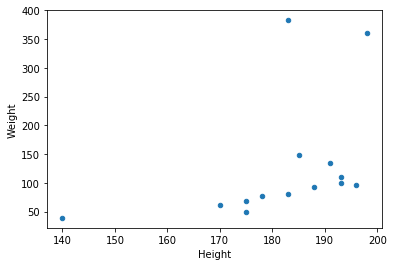

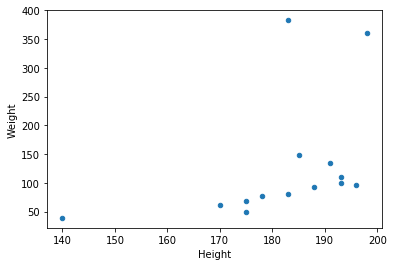

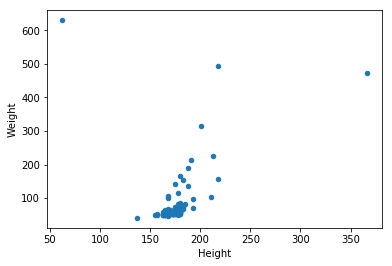

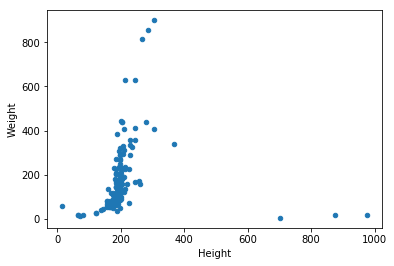

In [145]:
merged_df.groupby("Gender").plot.scatter("Height", "Weight")

In [146]:
groups = merged_df.groupby("Gender")

In [148]:
len(groups.groups)

3

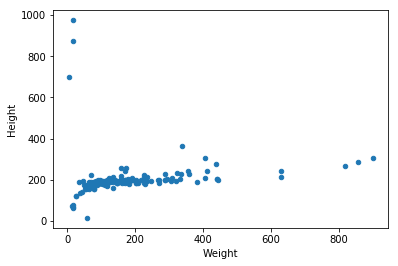

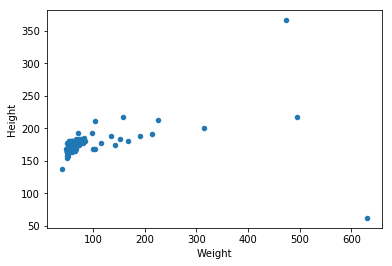

In [170]:
merged_df.groupby("Gender").get_group("Male").plot.scatter("Weight", "Height")
merged_df.groupby("Gender").get_group("Female").plot.scatter("Weight", "Height")

In [164]:
male_heights = merged_df.groupby("Gender").get_group("Male")["Height"]

In [165]:
female_heights = merged_df.groupby("Gender").get_group("Female")["Height"]

In [166]:
male_weights = merged_df.groupby("Gender").get_group("Male")["Weight"]

In [167]:
female_weights = merged_df.groupby("Gender").get_group("Female")["Weight"]

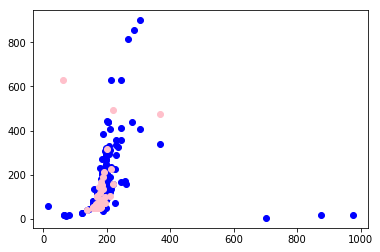

In [173]:
# fig, ax = plt.subplots()
plt.scatter(male_heights, male_weights, c='blue')
plt.scatter(female_heights, female_weights, c='pink')

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [176]:
male_heroes_df = merged_df.groupby("Gender").get_group("Male")
female_heroes_df = merged_df.groupby("Gender").get_group("Female")

def show_distplot(dataframe, gender, column_name):
    sns.distplot(dataframe.groupby("Gender").get_group(gender)[column_name])

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


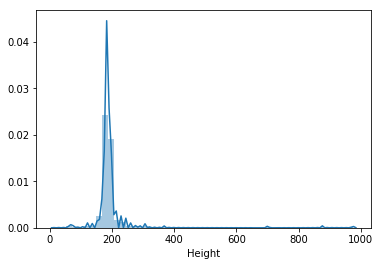

In [177]:
# Male Height
show_distplot(merged_df, "Male", "Height")

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


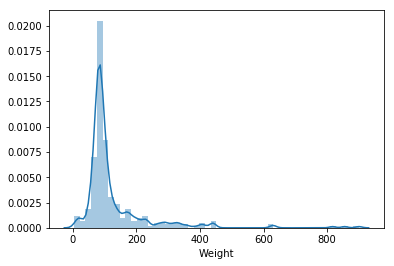

In [178]:
# Male Weight
show_distplot(merged_df, "Male", "Weight")

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


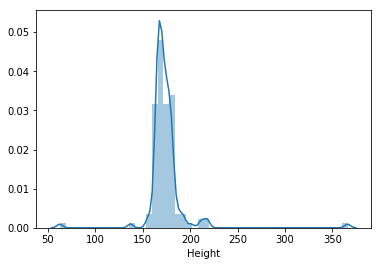

In [179]:
# Female Height
show_distplot(merged_df, "Female", "Height")

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


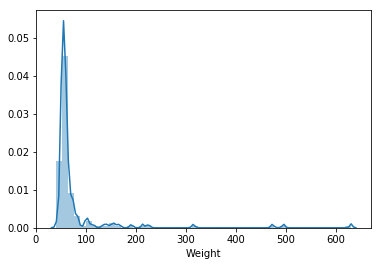

In [180]:
# Female Weight
show_distplot(merged_df, "Female", "Weight")

In [181]:
merged_df.groupby("Gender").describe()

Height                                                             \
        count        mean        std    min     25%    50%    75%    max   
Gender                                                                     
-        14.0  182.000000  14.790850  140.0  175.75  184.0  192.5  198.0   
Female  141.0  173.826241  21.581903   62.5  168.00  170.0  178.0  366.0   
Male    335.0  192.934925  69.147231   15.2  180.00  185.0  193.0  975.0   

       Weight                                                            
        count        mean         std   min    25%   50%     75%    max  
Gender                                                                   
-        14.0  128.642857  107.270045  39.0  70.25  94.0  128.75  383.0  
Female  141.0   78.340426   77.020761  41.0  54.00  58.0   65.00  630.0  
Male    335.0  125.734328  111.134613   4.0  79.00  90.0  120.50  900.0

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________
Males are heavier and taller and vary in height and weight more than females. The large variation in the male weights in particular seems to be associated with a small number of extreme outliers.


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data